In [1]:
import sys,os
import healpy as h
sys.path.append("../")
%pylab notebook
from modules import analysis
from modules import get_data as gd
import collections
import pandas as pd
pd.set_option('display.max_colwidth', 400)

def ensure_dir(file_path):
	directory = os.path.dirname(file_path)
	if not os.path.exists(directory):
		os.makedirs(directory)
        
from scipy.interpolate import interp1d
from scipy.integrate import quad
pd.set_option('display.max_colwidth', -1)
from scipy.io.idl import readsav


Populating the interactive namespace from numpy and matplotlib


In [2]:
maskname="mask46"
ion()
if maskname=="mask62":
    filename="../../dataout/masks/apodized_masks2m2m_v2.sav"
    vv=readsav(filename) ; print vv.viewkeys()
    mask=vv.apomask1m
elif maskname=="mask46":
    filename="../../dataout/masks/apodized_masks_v2.sav"
    vv=readsav(filename) ; print vv.viewkeys()
    mask=vv.apomask1m
elif maskname=="bicep":
    filename="../../dataout/masks/bicep2_mask_ns512.sav"
    vv=readsav(filename) ; print vv.viewkeys()
    mask=vv.bicep2mask

dict_keys(['apomask2m1', 'apomask1m'])


# Paths

In [3]:
result_path="../../results/new/" + maskname + "/PICO_low_needlets/"
ensure_dir(result_path)
tex_path=result_path + "/tex_table/"
ensure_dir(tex_path)
fig_path=result_path + "/figures/"
ensure_dir(fig_path)

ioff()
h.mollview(mask,title=r"$f_{\rm sky}$ = " + str(round(sum(mask)/size(mask),4)))
filename = fig_path + "mask.pdf"
savefig(filename,bbox_inches="tight")

color={}
color[0.0]="tab:blue"
color[0.3]="tab:green"
color[0.6]="tab:orange"
color[0.9]="tab:red"

# Analysis

In [4]:
rf=analysis.setup_r_forecasts(instrument="PICO",only_return_dict=False,verbose=False)
rf.setup_master(lmin=2,lmax=450,dell=16,fwhm=40.,mask=mask)
rf.run_spectral_analysis()
rf.tabulate_rlike(Alens_vals=[0.0,0.3,0.6,0.9],rprop=[1e-5,5e-2,2000],compute_map=False,rvar=1.)
rf.tabulate_rstat()

Getting :  /Users/adityarotti/Documents/Work/Projects/bmode_moments_analysis//dataout/pico_low_needlets//ffp10_lensedCls.dat


# Make tables

In [7]:
data_dict=collections.OrderedDict()
data_dict["Case"]=[]
data_dict["Moments"]=[]
data_dict["Parameters"]=[]
for idx,adr in enumerate(rf.adr_list):
    data_dict["Case"]=data_dict["Case"] + [adr]
    data_dict["Moments"]=data_dict["Moments"] + [rf.dd["lbl"][adr][10:]]
    data_dict["Parameters"]=data_dict["Parameters"] + [rf.dd["npar"][adr]]
df_datadef=pd.DataFrame(data_dict)

# Do not uncomment this line it gives bugs in the Latex file.
# df_datadef=df_datadef.set_index(["Case","Moments"],inplace=False)

filename=tex_path + "/data_definition.tex"
df_datadef.to_latex(filename,columns=["Case","Moments","Parameters"],column_format="cll",escape=False,index=False)

In [8]:
df_datadef

,Case,Moments,Parameters
0,cMILC00,$I_{\rm CMB}$,1
1,cMILC01,$I_{\rm CMB}$ ; $I_{\rm sync}$,2
2,cMILC02,$I_{\rm CMB}$ ; $I_{\rm dust}$,2
3,cMILC03,$I_{\rm CMB}$ ; $I_{\rm sync}$ ; $I_{\rm dust}$,3
4,cMILC04,$I_{\rm CMB}$ ; $I_{\rm dust}$ ; $\frac{d I_{\rm dust}}{d \beta}$,3
5,cMILC05,$I_{\rm CMB}$ ; $I_{\rm sync}$ ; $I_{\rm dust}$ ; $\frac{d I_{\rm dust}}{d \beta}$,4
6,cMILC06,$I_{\rm CMB}$ ; $I_{\rm sync}$ ; $I_{\rm dust}$ ; $\frac{d I_{\rm sync}}{d \beta}$ ; $\frac{d I_{\rm dust}}{d \beta}$ (H),5
7,cMILC07,$I_{\rm CMB}$ ; $I_{\rm sync}$ ; $I_{\rm dust}$ ; $\frac{d I_{\rm sync}}{d \beta}$ ; $\frac{d I_{\rm dust}}{d \beta}$ ; $\frac{d I_{\rm dust}}{d T}$,6
8,cMILC08,$I_{\rm CMB}$ ; $I_{\rm sync}$ ; $I_{\rm dust}$ ; $\frac{d I_{\rm sync}}{d \beta}$ ; $\frac{d I_{\rm dust}}{d \beta}$ ; $\frac{d I_{\rm dust}}{d T}$ ; $\frac{d^2 I_{\rm dust}}{d^2 T}$,7
9,cMILC09,$I_{\rm CMB}$ ; $I_{\rm sync}$ ; $I_{\rm dust}$ ; $\frac{d I_{\rm sync}}{d \beta}$ ; $\frac{d I_{\rm dust}}{d \beta}$ ; $\frac{d I_{\rm dust}}{d T}$ ; $\frac{d^2 I_{\rm dust}}{d^2 T}$ (H),7


In [9]:
table_stat=collections.OrderedDict()
# Ordering here is important. Same ordering in table and also for column names
table_stat["Case"]=[]
table_stat["Alens"]=[]
table_stat["rbias"]=[]
table_stat["rerr"]=[]
table_stat["ul"]=[]
table_stat["snr"]=[]

for adr in rf.adr_list:
    for Alens in rf.Alens_vals:
        table_stat["Case"]=table_stat["Case"] + list([adr])
        table_stat["Alens"]=table_stat["Alens"] + list([Alens])
        table_stat["rbias"]=table_stat["rbias"] + list([rf.rstat[adr][Alens]["mp"]])
        table_stat["rerr"]=table_stat["rerr"] + list([rf.rstat[adr][Alens]["sigma"]])
        table_stat["snr"]=table_stat["snr"] + list([rf.rstat[adr][Alens]["snr"]])
        table_stat["ul"]=table_stat["ul"] + list(np.float64([rf.rstat[adr][Alens]["ul"]]))
        
df_stat=pd.DataFrame(table_stat)
# df_stat.set_index(["Case","Alens","rbias","rerrl","rerrh","ul"],inplace=True)
df_stat.set_index(["Case","Alens"],inplace=True)
df_stat.columns=[r"$r_{\rm bias}$ ",r"$\sigma_r$",r"$r_{95}$","SNR"]
filename=tex_path + "r_statistics.tex"
df_stat.to_latex(filename,longtable=True,column_format="cccccc",escape=False,float_format="%.5f")#'%.4f')

In [10]:
df_stat

$r_{\rm bias}$   $\sigma_r$  $r_{95}$       SNR
Case    Alens                                                 
cMILC00 0.0    0.000291         0.000050   NaN        5.767081
        0.3    0.000379         0.000122   NaN        3.093361
        0.6    0.000438         0.000189   NaN        2.322201
        0.9    0.000459         0.000253    0.000986  1.814125
cMILC01 0.0    0.000266         0.000052   NaN        5.100260
        0.3    0.000372         0.000122   NaN        3.051606
        0.6    0.000434         0.000189   NaN        2.301716
        0.9    0.000457         0.000253    0.000984  1.806828
cMILC02 0.0    0.000218         0.000052   NaN        4.213077
        0.3    0.000338         0.000124   NaN        2.732051
        0.6    0.000425         0.000191   NaN        2.229966
        0.9    0.000459         0.000255    0.000989  1.800942
cMILC03 0.0    0.000193         0.000053   NaN        3.646303
        0.3    0.000326         0.000124   NaN        2.625126
        0.6    0.000418         0.000190   NaN        2.194017
        0.9    0.000453         0.000254    0.000983  1.780348
cMILC04 0.0    0.000200         0.000056   NaN        3.560531
        0.3    0.000339         0.000125   NaN        2.717902
        0.6    0.000443         0.000191   NaN        2.321327
        0.9    0.000485         0.000255    0.001016  1.901435
cMILC05 0.0    0.000164         0.000057   NaN        2.858024
        0.3    0.000291         0.000125   NaN        2.334614
        0.6    0.000377         0.000190    0.000771  1.985439
        0.9    0.000411         0.000254    0.000938  1.620241
cMILC06 0.0    0.000108         0.000072    0.000255  1.509836
        0.3    0.000238         0.000137    0.000520  1.739894
        0.6    0.000319         0.000198    0.000731  1.609678
        0.9    0.000352         0.000261    0.000894  1.352235
cMILC07 0.0    0.000185         0.000092   NaN        2.012177
        0.3    0.000304         0.000137   NaN        2.211127
        0.6    0.000395         0.000197   NaN        2.010273
        0.9    0.000434         0.000259    0.000972  1.678963
cMILC08 0.0    0.000357         0.000148   NaN        2.404867
        0.3    0.000387         0.000168   NaN        2.300761
        0.6    0.000427         0.000214    0.000871  1.998641
        0.9    0.000449         0.000270    0.001012  1.662867
cMILC09 0.0    0.000290         0.000075   NaN        3.864041
        0.3    0.000357         0.000151   NaN        2.367636
        0.6    0.000425         0.000207   NaN        2.053209
        0.9    0.000455         0.000266    0.001010  1.707222
cMILC10 0.0    0.000400         0.000411    0.001254  0.975282
        0.3    0.000400         0.000418    0.001268  0.958701
        0.6    0.000404         0.000436    0.001311  0.925234
        0.9    0.000409         0.000465    0.001377  0.878643
cMILC11 0.0    0.001303         0.000340   NaN        3.837784
        0.3    0.000436         0.000409    0.001286  1.065385
        0.6    0.000414         0.000431    0.001311  0.960094
        0.9    0.000414         0.000462    0.001375  0.896300
cMILC12 0.0    0.000498         0.007293    0.015678  0.068220
        0.3    0.000498         0.007293    0.015678  0.068217
        0.6    0.000498         0.007295    0.015681  0.068207
        0.9    0.000498         0.007296    0.015684  0.068191
cMILC13 0.0    0.003502         0.000588   NaN        5.952751
        0.3    0.002689         0.003345    0.009561  0.803996
        0.6    0.001794         0.005054    0.012211  0.354972
        0.9    0.001281         0.005872    0.013414  0.218201
cMILC14 0.0    0.000903        NaN         NaN       NaN      
        0.3    0.000903        NaN         NaN       NaN      
        0.6    0.000903        NaN         NaN       NaN      
        0.9    0.000903        NaN         NaN       NaN

# Make figures

## Likelihood evolution movie

In [16]:
Alens=0.3
ioff()
jpeg_path=fig_path + "/jpeg/" ; ensure_dir(jpeg_path)
for adr in rf.adr_list:
    filename=jpeg_path + "ps_and_bbposterir_" + adr + ".jpeg"
    filename_pdf=fig_path + "ps_and_bbposterir_" + adr + ".pdf"
    fig, ax = subplots(nrows=1, ncols=2, figsize=(16, 5))
#   fig, ax = subplots(nrows=1, ncols=2, figsize=(10, 3))
    ax[0].plot(rf.lbin,rf.clbin["lens"],"k*-",ms=8,lw=3,label=r"Theory $r \in [10^{-2},10^{-3}]$",alpha=0.6)
    ax[0].fill_between(rf.lbin,rf.clbin["bb"]*1e-2,rf.clbin["bb"]*1e-3,color="k",alpha=0.2)
    ax[0].plot(rf.lbin,rf.clbin["cmb"],"m.-",lw=3,label="True CMB")
    ax[0].plot(rf.lbin,rf.clbin["obs"][adr],"g--",lw=3,label="Observations")
    ax[0].plot(rf.lbin,rf.clbin["frg"][adr],"r-",lw=2,label="Residuals")
    var=((Alens*rf.clbin["cmb"])**2. + rf.clbin["noise"][adr]**2. + rf.clbin["frg"][adr]**2.)
    var=var*(2./((2.*rf.lbin+1)*rf.dell*rf.fsky))
    ax[0].plot(rf.lbin,np.sqrt(var),"bo-",alpha=0.5,lw=3,label=r"Total Noise $[A_{\rm lens}=$" + str(Alens) + "]")
    ax[0].plot(rf.lbin,rf.clbin["noise"][adr]*sqrt((2./((2.*rf.lbin+1)*rf.dell*rf.fsky))),'--',c="brown",lw=3,label="Instrument Noise")
    ax[0].legend(loc="upper left",ncol=2,title=rf.dd['simname'] + " [Lmax=" + str(rf.lmax) + "]",fontsize=8)
    ax[0].set_ylim(1e-6,1e1)
    ax[0].set_xlabel(r"multipole, $\ell$",fontsize=10)
    ax[0].set_ylabel(r"$\ell(\ell+1)C_{\ell}/(2\pi)$" + "  $\mu K^2$",fontsize=10)
    ax[0].grid(which="both",linestyle="--",alpha=0.5)
    ax[0].semilogy()
    ax[0].semilogx()
    for Alensp in rf.Alens_vals:
        ax[1].plot(rf.rvalues,rf.rlike_dict[adr][Alensp],lw=2,label=r"$A_{\rm lens}=" + str(Alensp) + "$",c=color[Alensp])
        ax[1].axvline(rf.rstat[adr][Alensp]["mp"],linestyle="-",alpha=0.8,c=color[Alensp])
        ax[1].axvline(rf.rstat[adr][Alensp]["mp"] - rf.rstat[adr][Alensp]["sigma"],linestyle="--",alpha=0.8,c=color[Alensp])
        ax[1].axvline(rf.rstat[adr][Alensp]["mp"] + rf.rstat[adr][Alensp]["sigma"],linestyle="--",alpha=0.8,c=color[Alensp])
    ax[1].set_xlabel("Tensor to scalar ratio (r)",fontsize=10)
    ax[1].set_ylabel(r"$e^{-\chi^2/2}$",fontsize=10)
    ax[1].legend(loc="upper right")
    ax[1].set_ylim(0,1.1)
    ax[1].grid(which="both",linestyle="--",alpha=0.4)
#     ax[1].semilogx()
    ax[1].set_xlim(1e-4,5e-3)
    ax[1].axvline(1e-3,color="k",linestyle="--",alpha=0.3)
    fig.suptitle(rf.dd["lbl"][adr])
    savefig(filename,bbox_inches="tight")
    ax[1].set_xlim(rf.rprop[0],rf.rprop[1])
    ax[1].semilogx()
    savefig(filename_pdf,bbox_inches="tight")
    
cwd=os.getcwd()
os.chdir(jpeg_path)
cmd = "convert -delay 200 -loop 0 *.jpeg ../" +  rf.dd['simname']
cmd = cmd + "_bbstat_evolve_moments_lmax" + str(rf.lmax) + "_dl" + str(rf.dell) + ".gif"
os.system(cmd)
cmd="rm *.jpeg" ; os.system(cmd)
os.chdir(cwd)

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

## Multipole by Multipole likelihood

In [9]:
ioff()
locx=linspace(0,len(rf.lbin)-1,5) ; tickx=linspace(min(rf.lbin),max(rf.lbin),5)
locy=linspace(0,len(rf.rvalues)-1,3) ; ticky=logspace(log10(rf.rprop[0]),log10(rf.rprop[1]),3)

jpeg_path=fig_path + "/jpeg/" ; ensure_dir(jpeg_path)

for adr in rf.adr_list:
    filename=jpeg_path + "ellbyell_bbposterir_" + adr + ".jpeg"
    fig, ax = subplots(nrows=2, ncols=2, figsize=(13, 8))

    i=0 ; j=0 ; Alens=0.0
    img0=ax[i,j].imshow(rf.rlike_map_dict[adr][Alens],aspect='auto',origin="lower",vmin=0,vmax=1)
    ax[i,j].set_xticks(locx) ; ax[i,j].set_xticklabels(tickx)
    ax[i,j].set_yticks(locy) ; ax[i,j].set_yticklabels(ticky)
    ax[i,j].set_title(r"$A_{\rm lens}=$" + str(Alens))
    # fig.colorbar(img0,ax=ax[i,j])
    ax[i,j].set_aspect('auto')

    i=0 ; j=1 ; Alens=0.3
    img1=ax[i,j].imshow(rf.rlike_map_dict[adr][Alens],aspect='auto',origin="lower",vmin=0,vmax=1)
    ax[i,j].set_xticks(locx) ; ax[i,j].set_xticklabels(tickx)
    ax[i,j].set_yticks(locy) ; ax[i,j].set_yticklabels(ticky)
    ax[i,j].set_title(r"$A_{\rm lens}=$" + str(Alens))
    # fig.colorbar(img1,ax=ax[i,j])
    ax[i,j].set_aspect('auto')

    i=1 ; j=0 ; Alens=0.6
    img2=ax[i,j].imshow(rf.rlike_map_dict[adr][Alens],aspect='auto',origin="lower",vmin=0,vmax=1)
    ax[i,j].set_xticks(locx) ; ax[i,j].set_xticklabels(tickx)
    ax[i,j].set_yticks(locy) ; ax[i,j].set_yticklabels(ticky)
    ax[i,j].set_title(r"$A_{\rm lens}=$" + str(Alens))
    # fig.colorbar(img2,ax=ax[i,j])
    ax[i,j].set_aspect('auto')

    i=1 ; j=1 ; Alens=0.9
    img3=ax[i,j].imshow(rf.rlike_map_dict[adr][Alens],aspect='auto',origin="lower",vmin=0,vmax=1)
    ax[i,j].set_xticks(locx) ; ax[i,j].set_xticklabels(tickx)
    ax[i,j].set_yticks(locy) ; ax[i,j].set_yticklabels(ticky)
    ax[i,j].set_title(r"$A_{\rm lens}=$" + str(Alens))
    # fig.colorbar(img3,ax=ax[i,j])
    ax[i,j].set_aspect('auto')

    fig.colorbar(img0, ax=ax.ravel().tolist(), shrink=0.6)

    fig.suptitle(rf.dd["lbl"][adr])
    savefig(filename,bbox_inches="tight")
    
cwd=os.getcwd()
os.chdir(jpeg_path)
cmd = "convert -delay 200 -loop 0 *.jpeg ../" +  rf.dd['simname']
cmd = cmd + "_ellbyell_bbpost_evolve_moments_lmax" + str(rf.lmax) + "_dl" + str(rf.dell) + ".gif"
os.system(cmd)
cmd="rm *.jpeg" ; os.system(cmd)
os.chdir(cwd)

KeyError: 0.0

## Summary statistics plots

In [5]:
sumstat={}
sumstat["r_err"]=collections.OrderedDict()
sumstat["r_ul"]=collections.OrderedDict()
sumstat["r_bias"]=collections.OrderedDict()
sumstat["snr"]=collections.OrderedDict()
sumstat["uplims"]=collections.OrderedDict()

idx_max=15
idx_list=np.arange(len(rf.adr_list[:idx_max]))

for Alens in rf.Alens_vals:
    for key in sumstat.keys():
        sumstat[key][Alens]=np.zeros(len(rf.adr_list[:idx_max]))
        if key=="uplims":
            sumstat[key][Alens]=[]
        
for idx,adr in enumerate(rf.adr_list[:idx_max][::-1]):
    for Alens in rf.Alens_vals:
        sumstat["r_ul"][Alens][idx]=rf.rstat[adr][Alens]["ul"]
        if np.isnan(rf.rstat[adr][Alens]["ul"]):
            sumstat["r_err"][Alens][idx]=rf.rstat[adr][Alens]["sigma"]
            sumstat["snr"][Alens][idx]=rf.rstat[adr][Alens]["snr"]
            sumstat["uplims"][Alens]=sumstat["uplims"][Alens] + list([False])
        else:
            sumstat["r_err"][Alens][idx]=np.NAN
            sumstat["snr"][Alens][idx]=np.NAN
            sumstat["uplims"][Alens]=sumstat["uplims"][Alens] + list([True])
        sumstat["r_bias"][Alens][idx]=rf.rstat[adr][Alens]["mp"]
        

In [6]:
fig, ax = subplots(nrows=1, ncols=4, figsize=(16, 4),sharey=True)
for ia,Alens in enumerate(rf.Alens_vals):
    ax[ia].errorbar(sumstat["r_bias"][Alens]+sumstat["r_ul"][Alens], idx_list,xerr=sumstat["r_ul"][Alens],
           marker='',color='k',ecolor='g',markerfacecolor='k',label="",capsize=4,
           elinewidth=2,linestyle='None',xuplims=sumstat["uplims"][Alens])
    ax[ia].errorbar(sumstat["r_bias"][Alens],idx_list,xerr=sumstat["r_err"][Alens],
           marker='.',color='k',ecolor='r',markerfacecolor='k',label=" ",capsize=3,
           elinewidth=2,linestyle='None')
    ax[ia].semilogx()
    ax[ia].legend(title=str(int(ceil((1-Alens)*100))) + r"% delensing")
    ax[ia].axvline(3e-3,ls="--",c="k")
    ax[ia].axvline(0.07,ls="--",c="b")
#     ax[ia].set_xlim(rf.rprop[0],rf.rprop[1])
    ax[ia].set_xlim(1e-5,5e-2)
    ax[ia].set_xlabel(r"$\it r$",fontsize=10)
    ax[ia].grid(which="both",alpha=0.3,linestyle="dashed")
    ax[ia].set_yticks(idx_list) ; ax[0].set_yticklabels(rf.adr_list[:idx_max][::-1],rotation=0,fontsize=10)
fig.suptitle(r"$\ell_{\rm min}$ = " + str(rf.lmin))
subplots_adjust(wspace=0.05, hspace=0)
filename=fig_path + rf.dd["simname"] + "_summary_statistics_lmin" + str(rf.lmin).zfill(3) + ".pdf"
savefig(filename,bbox_inches="tight",dpi=250)
filename=fig_path + rf.dd["simname"] + "_summary_statistics_lmin" + str(rf.lmin).zfill(3) + ".jpeg"
savefig(filename,bbox_inches="tight",dpi=250)

## PS test

<IPython.core.display.Javascript object>


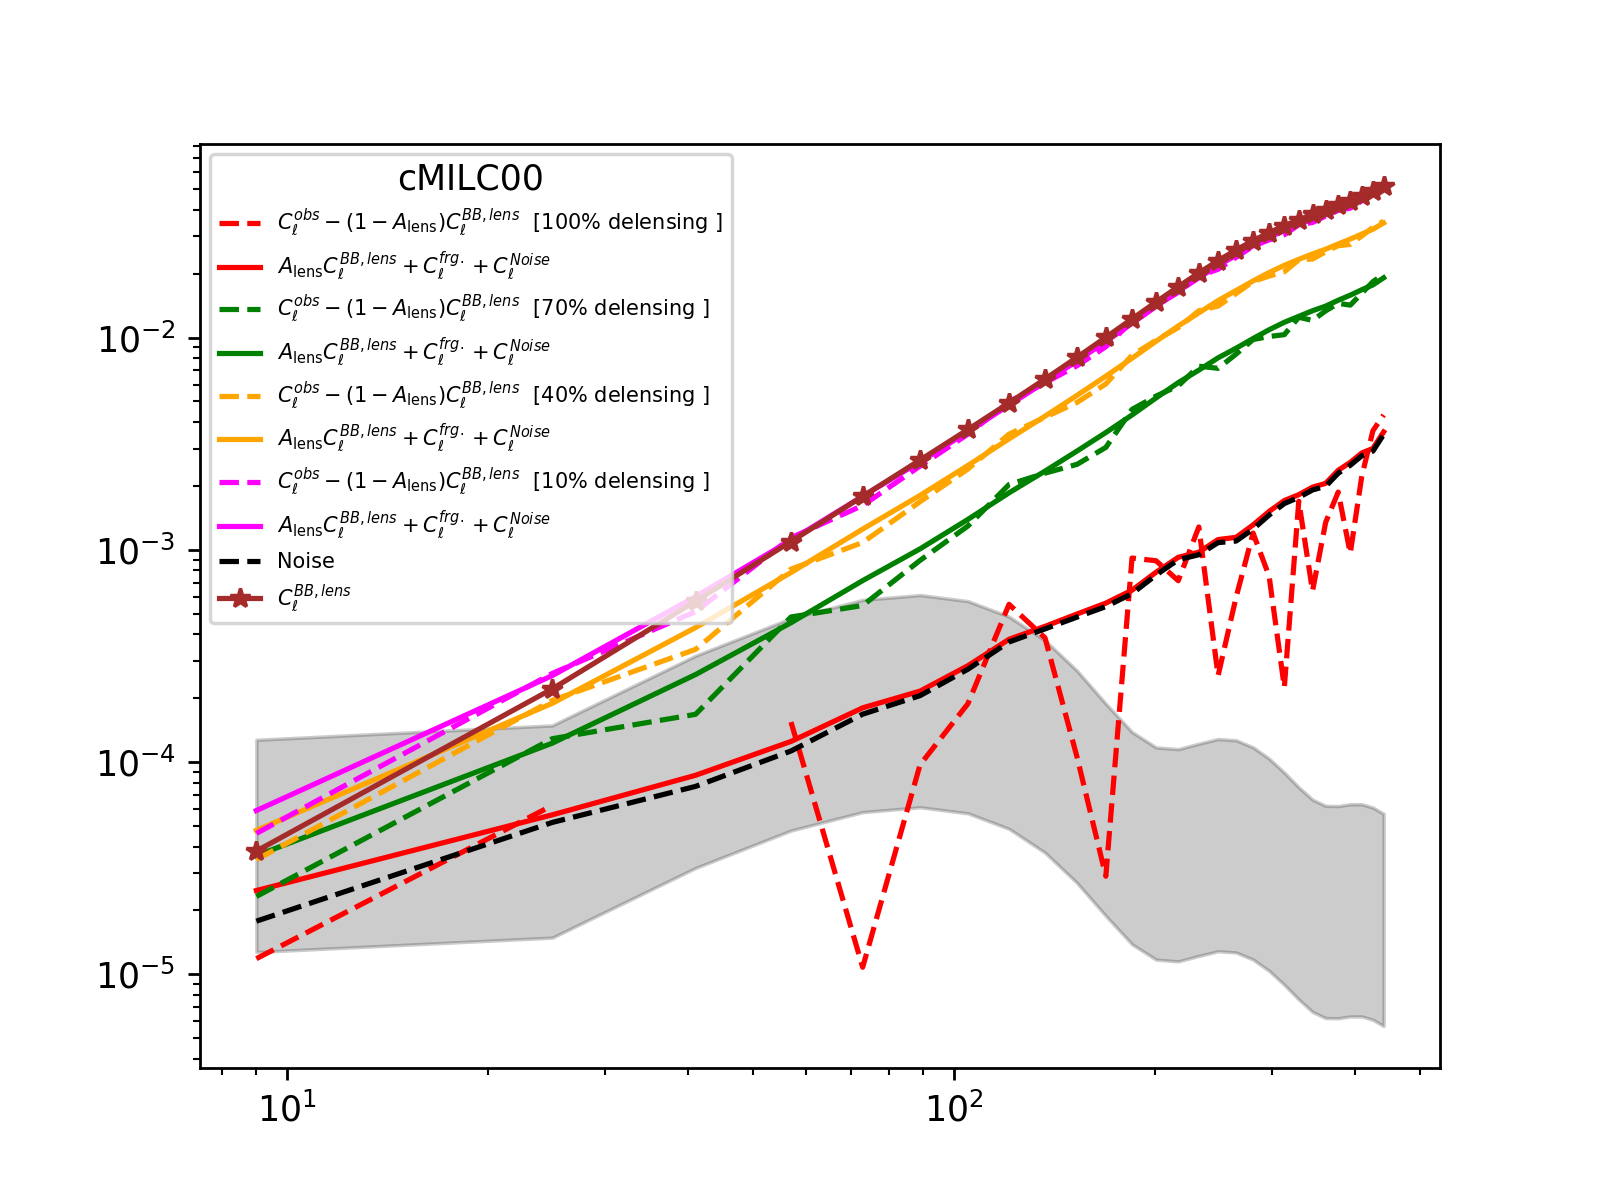

In [10]:
ion()
color={} 
color[rf.Alens_vals[0]]="red" 
color[rf.Alens_vals[1]]="green" 
color[rf.Alens_vals[2]]="orange"
color[rf.Alens_vals[3]]="magenta"

adr="cMILC00"

lbl0=r"$C_{\ell}^{obs} - (1- A_{\rm lens})C_{\ell}^{BB, lens}$"
lbl1=r"$A_{\rm lens} C_{\ell}^{BB, lens} + C_{\ell}^{frg.} + C_{\ell}^{Noise}$"
figure()
Alens=rf.Alens_vals[0]
plot(rf.lbin,rf.clbin["obs"][adr] - (1.-Alens)*rf.clbin["lens"],
     "--",c=color[Alens],label=lbl0 + "  [" + str(int(ceil((1-Alens)*100))) + r"% delensing ]")
plot(rf.lbin,Alens*rf.clbin["lens"] +rf.clbin["frg"][adr] + rf.clbin["noise"][adr],"-",c=color[Alens],label=lbl1)
Alens=rf.Alens_vals[1]
plot(rf.lbin,rf.clbin["obs"][adr] - (1.-Alens)*rf.clbin["lens"],
     "--",c=color[Alens],label=lbl0 + "  [" + str(int(ceil((1-Alens)*100))) + r"% delensing ]")
plot(rf.lbin,Alens*rf.clbin["lens"] +rf.clbin["frg"][adr] + rf.clbin["noise"][adr],"-",c=color[Alens],label=lbl1)
Alens=rf.Alens_vals[2]
plot(rf.lbin,rf.clbin["obs"][adr] - (1.-Alens)*rf.clbin["lens"],
     "--",c=color[Alens],label=lbl0 + "  [" + str(int(ceil((1-Alens)*100))) + r"% delensing ]")
plot(rf.lbin,Alens*rf.clbin["lens"] +rf.clbin["frg"][adr] + rf.clbin["noise"][adr],"-",c=color[Alens],label=lbl1)
Alens=rf.Alens_vals[3]
plot(rf.lbin,rf.clbin["obs"][adr] - (1.-Alens)*rf.clbin["lens"],
     "--",c=color[Alens],label=lbl0 + "  [" + str(int(ceil((1-Alens)*100))) + r"% delensing ]")
plot(rf.lbin,Alens*rf.clbin["lens"] +rf.clbin["frg"][adr] + rf.clbin["noise"][adr],"-",c=color[Alens],label=lbl1)
semilogy()
semilogx()
plot(rf.lbin,rf.clbin["noise"][adr],"k--",label="Noise")
plot(rf.lbin,rf.clbin["lens"],"-*",c="brown",label=r"$C_{\ell}^{BB, lens}$")
fill_between(rf.lbin,rf.clbin["bb"]*1e-2,rf.clbin["bb"]*1e-3,color="k",alpha=0.2)
legend(loc=0,title=adr,fontsize=6)
# loglog()
filename=fig_path + "ps_test_" + adr + ".pdf"
savefig(filename,bbox_inches="tight",dpi=250)

In [8]:
# import matplotlib.pyplot as plt
# ioff()
# for ia,Alens in enumerate(rf.Alens_vals):
#     filename=jpeg_path + "summary_statistics_" + str(ia).zfill(2) + ".jpeg"
#     fig, ax = subplots(nrows=1, ncols=3, figsize=(16, 4),sharey=True)
#     img0=ax[0].scatter(idx_list,sumstat["r_bias"][Alens],marker="*",s=100,label="Bias",c=sumstat["snr"][0.0],
#                 cmap=plt.cm.jet)
#     ax[0].legend(loc="upper left") ; ax[0].semilogy() ; ax[0].set_ylim(1e-4,2e-2)
#     ax[0].axhline(3e-3,linestyle="--",color="black",lw=2)
#     ax[0].axhline(5e-4,linestyle="-.",color="gray",lw=2)
#     ax[0].set_xticks(idx_list) ; ax[0].set_xticklabels(rf.adr_list,rotation=75,fontsize=8)
#     ax[0].grid(which="both",alpha=0.3)
#     ax[0].set_ylabel("Tensor to scalar ratio $r$",fontsize=15)

#     ax[1].scatter(idx_list,sumstat["r_err"][Alens],marker="*",s=100,label="Error",c=sumstat["snr"][0.0],
#                cmap=plt.cm.jet)
#     ax[1].legend(loc="upper left") ; ax[1].semilogy() ; ax[1].set_ylim(1e-4,2e-2)
#     ax[1].axhline(3e-3,linestyle="--",color="black",lw=2)
#     ax[1].axhline(5e-4,linestyle="-.",color="gray",lw=2)
#     ax[1].set_xticks(idx_list) ; ax[1].set_xticklabels(rf.adr_list,rotation=75,fontsize=8)
#     ax[1].grid(which="both",alpha=0.3)

#     ax[2].scatter(idx_list,sumstat["r_ul"][Alens],marker="*",s=100,label="95% Upper limit",c=sumstat["snr"][0.0],
#                cmap=plt.cm.jet)
#     ax[2].legend(loc="upper left") ; ax[2].semilogy() ; ax[2].set_ylim(1e-4,2e-2)
#     ax[2].axhline(3e-3,linestyle="--",color="black",lw=2)
#     ax[2].axhline(5e-4,linestyle="-.",color="gray",lw=2)
#     ax[2].set_xticks(idx_list) ; ax[2].set_xticklabels(rf.adr_list,rotation=75,fontsize=8)
#     ax[2].grid(which="both",alpha=0.3)
#     fig.colorbar(img0,ax=ax[2])
#     subplots_adjust(wspace=0.05, hspace=0)
#     fig.suptitle(r"$A_{\rm lens}=$" + str(Alens))
#     savefig(filename,bbox_inches="tight")
    
# cwd=os.getcwd()
# os.chdir(jpeg_path)
# cmd = "convert -delay 200 -loop 0 *.jpeg ../" +  rf.dd['simname']
# cmd = cmd + "_summary_statistics_lmax" + str(rf.lmax) + "_dl" + str(rf.dell) + ".gif"
# os.system(cmd)
# cmd="rm *.jpeg" ; os.system(cmd)
# os.chdir(cwd)